# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b>🚕 New York Taxi Fare Prediction<span style="color: #000000"> Exploratory Data Analysis & Prediction 🔮</span></b><br><span style="color: #FF5C8A; font-size: 24px">with Linear Regression </span></h1>
<hr>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Basic Data Cleaning and Preprocessing</div>
<center>


Data cleaning and preprocessing is very essential to get an overall feel of the data. Preprocessing is important to feed the data further in the algorithms so that they can work effectively!

In [2]:
data = pd.read_csv('train_NYTaxi.csv')

In [3]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5
...,...,...,...,...,...,...,...,...,...
99995,99995,2015-06-08 07:05:28.0000003,4.5,2015-06-08 07:05:28 UTC,-73.965111,40.772343,-73.952072,40.768021,1
99996,99996,2012-09-17 15:09:00.000000161,25.5,2012-09-17 15:09:00 UTC,-73.786162,40.640710,-73.878865,40.658735,1
99997,99997,2013-02-02 19:02:00.00000047,14.5,2013-02-02 19:02:00 UTC,-73.982023,40.758052,-73.993930,40.734462,1
99998,99998,2013-12-28 15:44:17.0000004,9.0,2013-12-28 15:44:17 UTC,-73.956423,40.778140,-73.981008,40.779568,1


In [4]:
df = pd.DataFrame(data)
df_temp = pd.DataFrame(data)
df.shape

(100000, 9)

We can see that our dataset contains 1000000 rows and 9 attributes!

Now let's see the correlation coefficient of all the attributes with the other attributes, as this will tell us more about how the various attributes depend on each other and we'll get a better insight on the dependency of attributes over each other. BUt before let's drop some useless attributes like key, and Unnamed:0, which are textual and may cause problems with the algorithm

In [5]:
df = df.drop(["Unnamed: 0", "key", "pickup_datetime"], axis=1)

In [6]:
df.corr()
# this will make a correlation matrix which computes the Pearsons correlation coefficent 
# of columns with each other.

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.007800,-0.008362,0.006540,-0.007727,0.015256
pickup_longitude,0.007800,1.000000,-0.942797,0.777811,-0.921485,0.004231
pickup_latitude,-0.008362,-0.942797,1.000000,-0.768895,0.947429,-0.008710
dropoff_longitude,0.006540,0.777811,-0.768895,1.000000,-0.802035,0.006723
dropoff_latitude,-0.007727,-0.921485,0.947429,-0.802035,1.000000,-0.008820
passenger_count,0.015256,0.004231,-0.008710,0.006723,-0.008820,1.000000


Now let's make a heatmap out of the above matrix for a better visual understanding

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.007800,-0.008362,0.006540,-0.007727,0.015256
pickup_longitude,0.007800,1.000000,-0.942797,0.777811,-0.921485,0.004231
pickup_latitude,-0.008362,-0.942797,1.000000,-0.768895,0.947429,-0.008710
dropoff_longitude,0.006540,0.777811,-0.768895,1.000000,-0.802035,0.006723
dropoff_latitude,-0.007727,-0.921485,0.947429,-0.802035,1.000000,-0.008820
passenger_count,0.015256,0.004231,-0.008710,0.006723,-0.008820,1.000000


Now let's visualize this dependacy using seaborn

The above plot has drawn scatter plots or histograms of the various attributes with each other, which helps a lot in correlation analysis

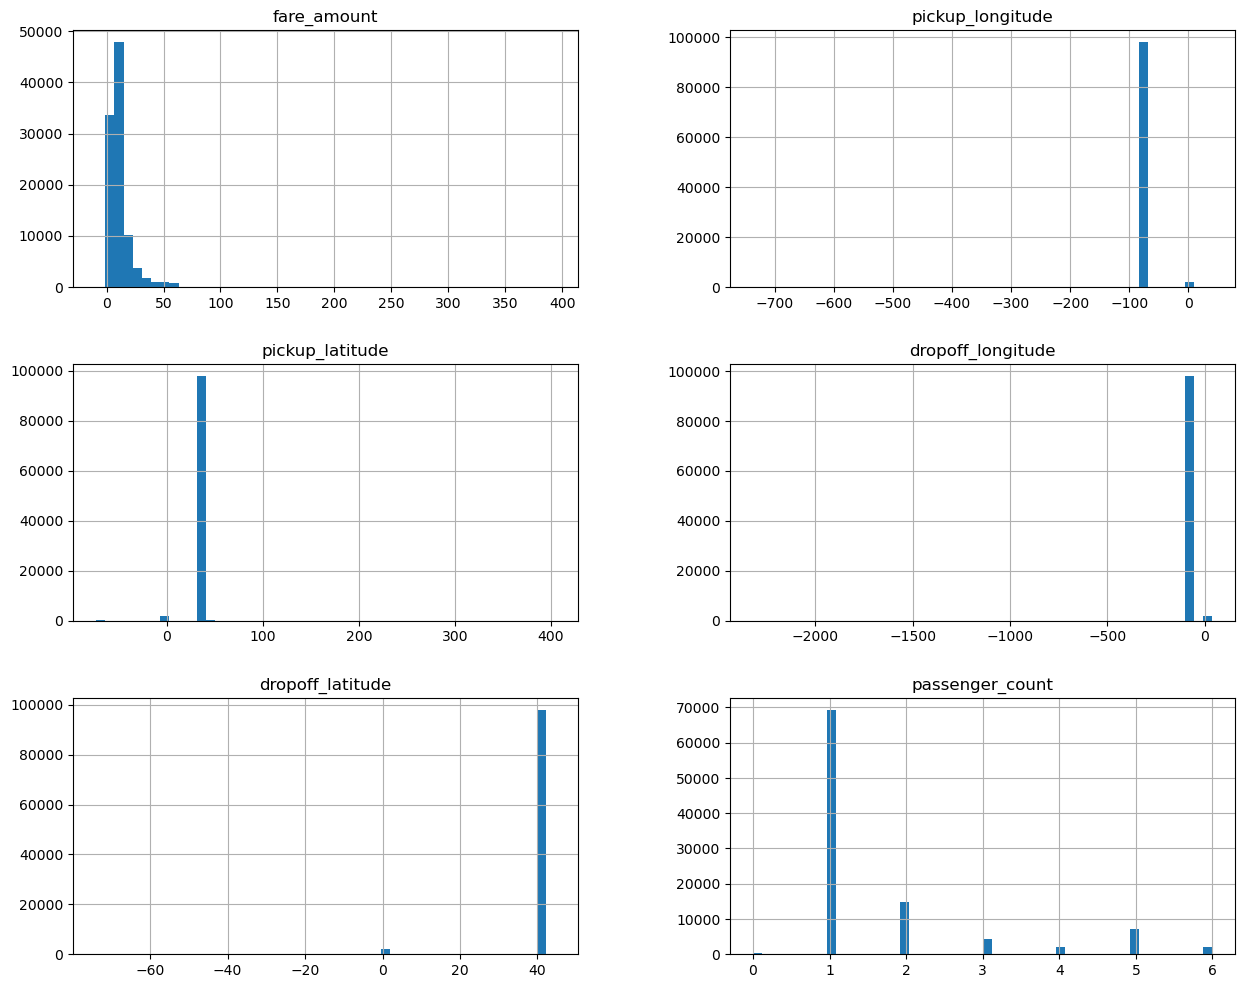

In [8]:
from matplotlib import pyplot as plt

df.hist(bins=50, figsize=(15,12))
plt.show()

We can see that some of the latitudes and longitudes are 0, which means that the passesnger went from New York to the North Pole, which is something not feasible 😆, so we'll remove the rows in which the coordinates are 0, as rest of the point falls within NY radius.

In [9]:
lat0_pick = []
lon0_pick = []
lat0_drop = []
lon0_drop = []

for i in range (0, len(df)):
    if df['pickup_longitude'][i] == 0:
        lon0_pick.append(i)

for i in range (0, len(df)):
    if df['pickup_latitude'][i] == 0:
        lat0_pick.append(i)

for i in range (0, len(df)):
    if df['dropoff_longitude'][i] == 0:
        lat0_drop.append(i)
        
for i in range (0, len(df)):
    if df['pickup_longitude'][i] == 0:
        lat0_drop.append(i)
        
lon0_pick.extend(lat0_pick)
lon0_pick.extend(lat0_drop)
lon0_pick.extend(lon0_drop)

In [10]:
temp_coordinates = set(lon0_pick)
temp_coord_list = list(temp_coordinates)
temp_coord_list

[73732,
 8198,
 16390,
 57350,
 19,
 32788,
 81945,
 24606,
 32,
 81953,
 38,
 39,
 16423,
 73770,
 65580,
 57390,
 90166,
 8248,
 41020,
 65596,
 98364,
 41026,
 73798,
 73802,
 32846,
 98383,
 8288,
 24672,
 103,
 16490,
 98413,
 32878,
 73839,
 82037,
 57462,
 82038,
 32890,
 98426,
 82044,
 16515,
 98435,
 24723,
 73877,
 32919,
 41111,
 49304,
 65691,
 73886,
 41122,
 98467,
 73895,
 57517,
 57523,
 181,
 82105,
 24762,
 90300,
 65731,
 24773,
 73932,
 98510,
 32981,
 65750,
 215,
 57567,
 90342,
 232,
 98539,
 98541,
 24815,
 49397,
 49400,
 57594,
 41214,
 98560,
 8455,
 57613,
 73997,
 65814,
 74008,
 8474,
 74010,
 74011,
 285,
 16669,
 82206,
 90394,
 49451,
 41263,
 74031,
 57658,
 33086,
 24897,
 65858,
 98626,
 16708,
 16710,
 33101,
 98638,
 98639,
 90462,
 41311,
 65888,
 90466,
 8548,
 362,
 33130,
 49515,
 98666,
 90479,
 41329,
 16754,
 98674,
 24951,
 82297,
 41338,
 90490,
 24953,
 65918,
 8577,
 41345,
 8581,
 82316,
 65946,
 49570,
 57762,
 16809,
 65961,
 82352,


We have stored values of where the pickup, dropoff latitude and longitude has a value of 0, and have stored the indices of such rows in a list temp_coord_list, and now we'll drop these values from our DataFrame!

In [11]:
df.drop(temp_coord_list, axis=0, inplace=True)
df = df.reset_index()
df_reuse = df
df

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.9,-73.998287,40.727490,-73.989854,40.735239,2
1,1,4.9,-73.966597,40.794345,-73.965682,40.803808,2
2,2,6.9,-73.971638,40.763382,-73.953767,40.783715,1
3,3,14.1,-74.003545,40.707399,-73.981312,40.750071,1
4,4,12.1,-74.004532,40.707465,-73.977908,40.745633,5
...,...,...,...,...,...,...,...
97944,99995,4.5,-73.965111,40.772343,-73.952072,40.768021,1
97945,99996,25.5,-73.786162,40.640710,-73.878865,40.658735,1
97946,99997,14.5,-73.982023,40.758052,-73.993930,40.734462,1
97947,99998,9.0,-73.956423,40.778140,-73.981008,40.779568,1


We have stored the cleaned dataset into df_reuse whenever we will need clean data for pipelines etc as the method will be same.

Now let's check the histogram of the coordinates and see if there still are some latitudes and longitudes with missing values

/Users/ankitsoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


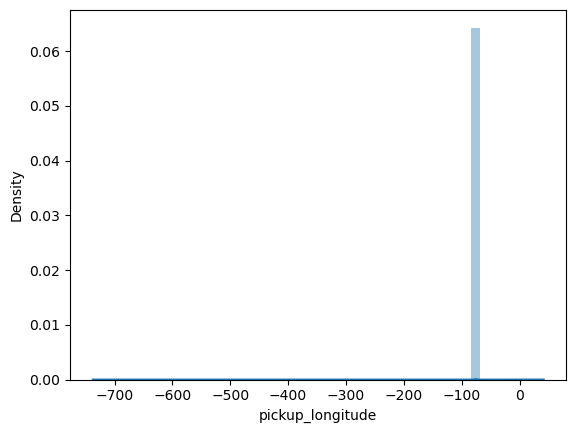

In [12]:
import seaborn as sns
sns.distplot(df['pickup_longitude']);

/Users/ankitsoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


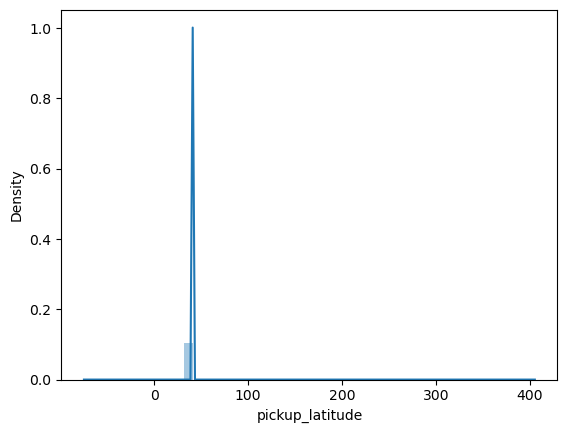

In [13]:
sns.distplot(df['pickup_latitude']);

We can see that our data is much more cleaner now as we have deleted the faulty rows with value of latitude and longitudes as 0 

In [21]:
passenger = df['passenger_count']
passenger

0        2
1        2
2        1
3        1
4        5
        ..
97944    1
97945    1
97946    1
97947    1
97948    1
Name: passenger_count, Length: 97949, dtype: int64

Now let's check for the missing values in our dataset so that we can impute those values with suitable data points

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Finding Missing Values</div>
<center>


Missing values can prove to be a major pain as they may affect the run of the algorithms as almost all the algorithms expect the full data but return error if some points are missing. So, cleaning the data is essential!

<AxesSubplot:>

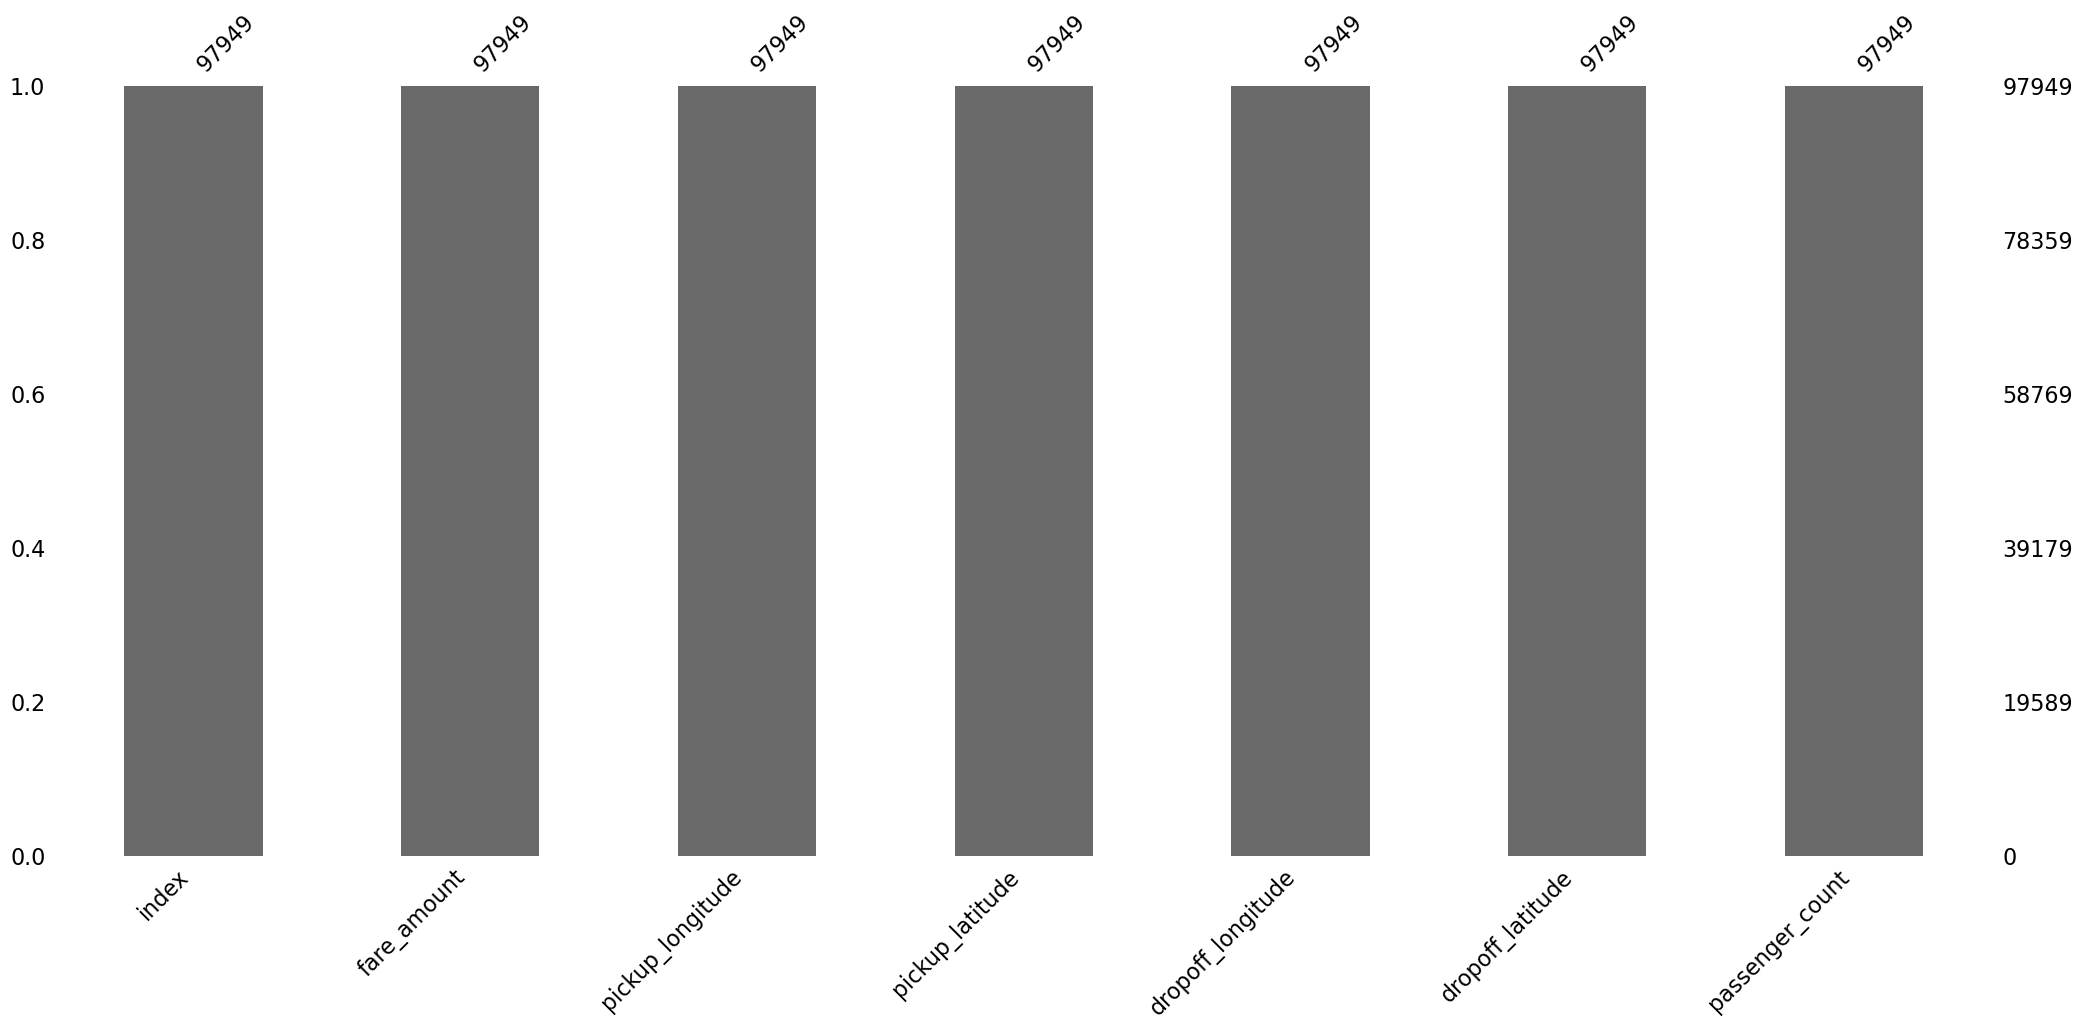

In [22]:
# using missingno library to get a feel of the missing entries

import missingno as msno
msno.bar(df)

Since this is a cleaned sample, there is no missing data in here. However, had it been the original one, there would definitely had been some missing data points which we would have to fill. Let's assume that we have some missing data. Some of the most popular ways to feed the cells with empty data points are:<br>
* Fill in the missing part with the median of the rest of the cells
* Fill in the missing part with the mean of the rest of the cells
* Fill in the missing part with the value contained by the previous cell

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Imputing Missing Values</div>
<center>


There are many ways to impute the mission data points like:
* Fill the missing points with the mean of rest of the data
* Fill the missing values with previous values
* Fill the missing points with the median of rest of the dataset
<br><br> We'll fill the values with previous points

In [23]:
df

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.9,-73.998287,40.727490,-73.989854,40.735239,2
1,1,4.9,-73.966597,40.794345,-73.965682,40.803808,2
2,2,6.9,-73.971638,40.763382,-73.953767,40.783715,1
3,3,14.1,-74.003545,40.707399,-73.981312,40.750071,1
4,4,12.1,-74.004532,40.707465,-73.977908,40.745633,5
...,...,...,...,...,...,...,...
97944,99995,4.5,-73.965111,40.772343,-73.952072,40.768021,1
97945,99996,25.5,-73.786162,40.640710,-73.878865,40.658735,1
97946,99997,14.5,-73.982023,40.758052,-73.993930,40.734462,1
97947,99998,9.0,-73.956423,40.778140,-73.981008,40.779568,1


In [24]:
df["fare_amount"].fillna( method ='ffill', inplace = True)
df["pickup_longitude"].fillna( method ='ffill', inplace = True)
df["pickup_latitude"].fillna( method ='ffill', inplace = True)
df["dropoff_longitude"].fillna( method ='ffill', inplace = True)
df["dropoff_latitude"].fillna( method ='ffill', inplace = True)
df["passenger_count"].fillna( method ='ffill', inplace = True)

We have imputed the missing values with the mean of the rest of the data points, now let's check if we have any more missing data

<AxesSubplot:>

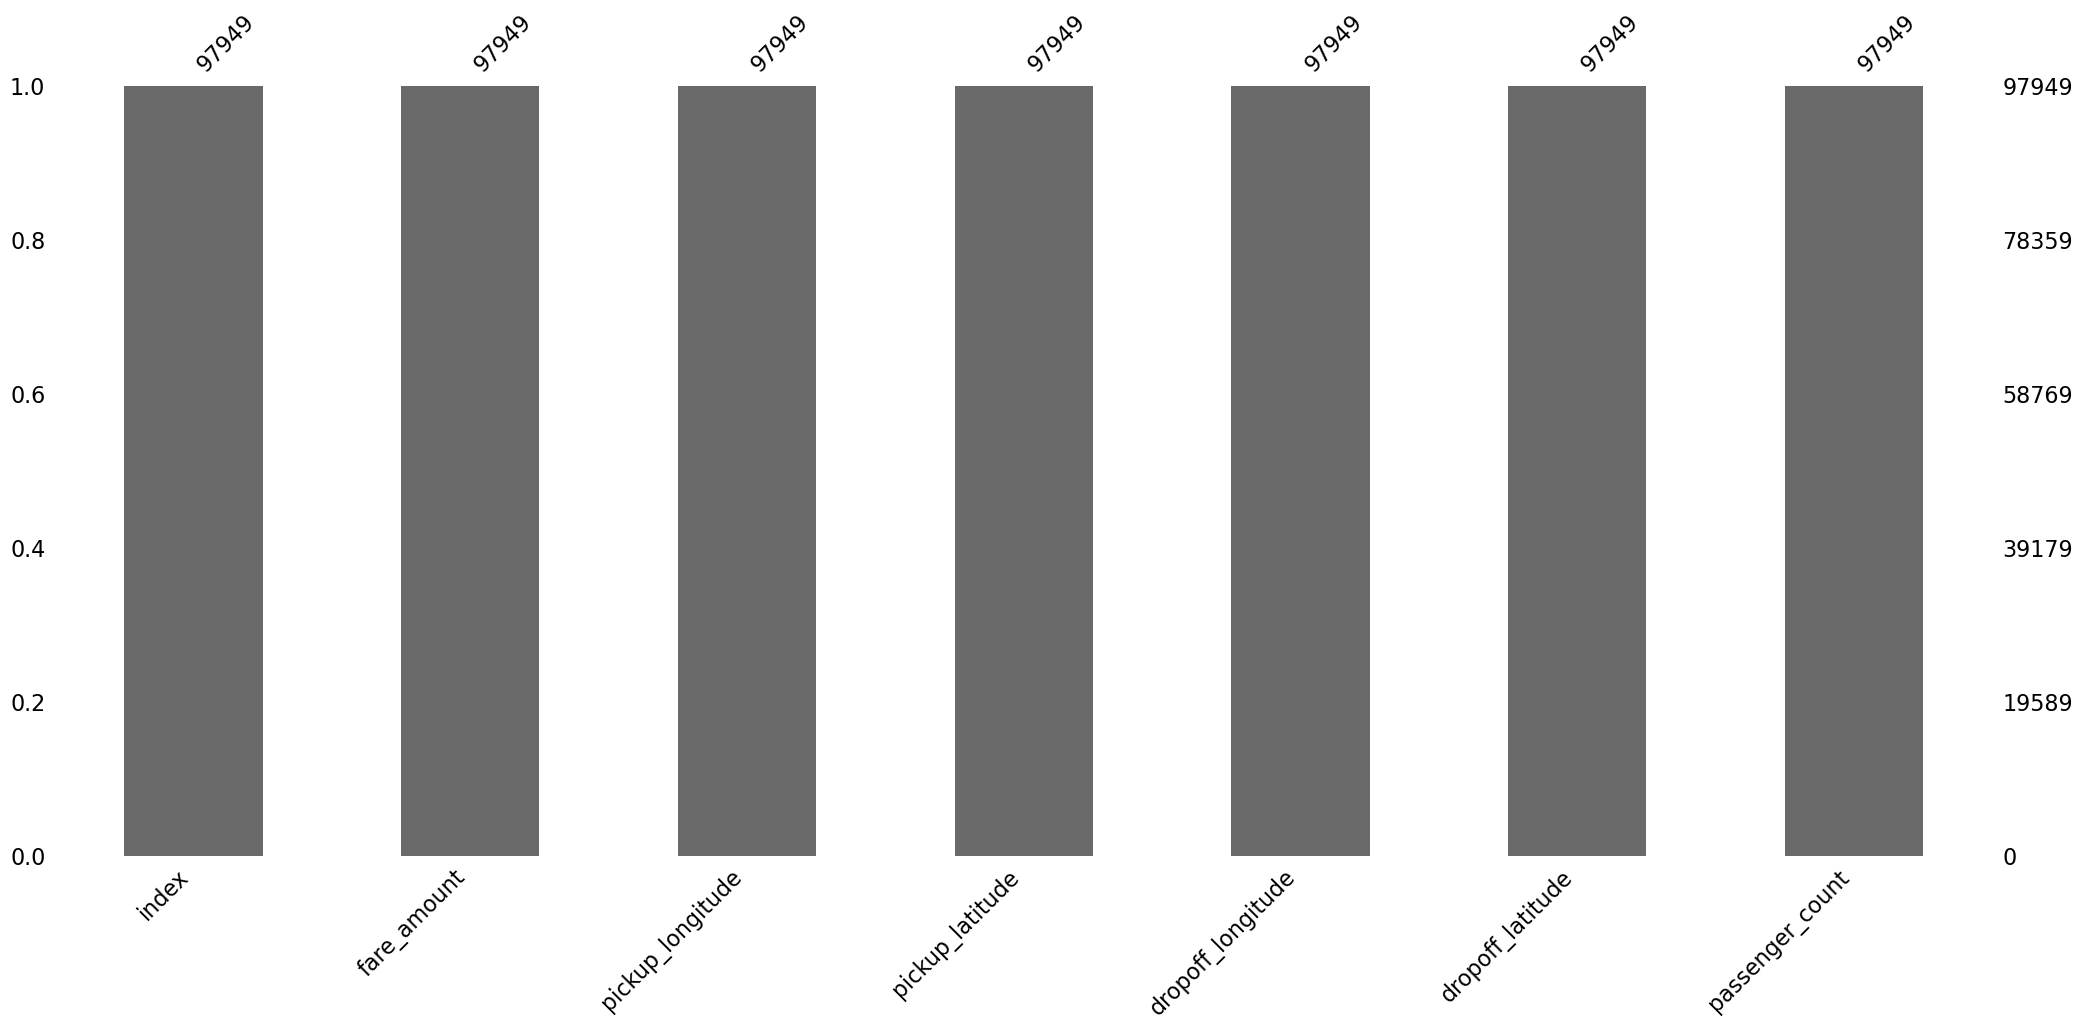

In [25]:
msno.bar(df)

We have imputed the values in all the missing data points, and as a result according to the above bar chart, we have no missing values left now.

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Creating New Features | Basic Data Analysis</div>
<center>


The features which are available to us at the current moment are:
1. pickup_longitude
2. pickup_latitude
3. dropooff_longitude
4. dropoff_latitude
5. passenger_count

If we have a look at these features, we find that the latitue and the longitude points in itself are quite useless in themselves. If we manage to make some new important features, then we can easily improve the overall accuracy of the model! For example some of the features that we can make are:
1. From the Latitude and Longitude find out the distance that the person travels
2. Which day of the week the passenger is travelling 
3. The hour of the day in which the passenger is travelling and so on...

First let's calculate the haversine distance travelled for each ride:

In [26]:
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a))

In [27]:
dist = []

for i in range (0, len(df)):
    dist.append(distance(df['pickup_latitude'][i], df['pickup_longitude'][i], df['dropoff_latitude'][i], df['dropoff_longitude'][i]))

In [28]:
dist

[1.1168498889884628,
 1.0550526384413381,
 2.7159585973935125,
 5.10137029965359,
 4.800593160149654,
 7.08830054690851,
 3.1405828127310667,
 3.191260127015559,
 1.1277578611936294,
 0.11713078591603918,
 1.7774768172704989,
 1.8509010942240147,
 5.778356781623224,
 1.801965793258296,
 1.1815747477688208,
 2.502742337369844,
 2.099097444240245,
 5.7476319770700215,
 2.410065423512007,
 1.7845708967493885,
 1.1304147281704195,
 1.845639143678745,
 1.9869420660108001,
 3.476606400721546,
 2.4790314859304696,
 0.8423115192179811,
 1.3396352777388332,
 1.4461565233732616,
 2.7835107909919827,
 8.321649747723173,
 5.16005945102519,
 2.6162863149858846,
 2.165637534202619,
 1.569724332793827,
 2.491088111883622,
 10.103310137807002,
 2.076041898793324,
 5.410839755890168,
 7.948039326115198,
 0.8131588796255107,
 0.6811575997871196,
 0.9938746165597396,
 3.485310782229157,
 0.9586392203477833,
 3.4282554827936904,
 0.8946839397564637,
 1.4242270589785695,
 20.75552646247378,
 3.695082684194

In [29]:
count = 0
zero_dist = []
for i in range (0, len(dist)):
    if dist[i] == 0:
        count=count+1
        zero_dist.append(i)
zero_dist

[178,
 309,
 313,
 315,
 497,
 557,
 650,
 825,
 830,
 996,
 1053,
 1135,
 1217,
 1283,
 1623,
 1762,
 2094,
 2368,
 2424,
 2720,
 2899,
 2998,
 3039,
 3053,
 3151,
 3162,
 3364,
 3378,
 3512,
 3619,
 3811,
 3857,
 3895,
 3990,
 4030,
 4057,
 4162,
 4324,
 4449,
 4488,
 4536,
 4561,
 4723,
 4738,
 4852,
 5023,
 5064,
 5151,
 5235,
 5299,
 5300,
 5425,
 5449,
 5467,
 5674,
 5700,
 5779,
 5822,
 5889,
 5897,
 5917,
 6104,
 6129,
 6284,
 6330,
 6398,
 6500,
 6567,
 6629,
 6692,
 6746,
 6794,
 7014,
 7029,
 7242,
 7264,
 7586,
 7744,
 7815,
 7929,
 8306,
 8330,
 8368,
 8493,
 8528,
 8534,
 8618,
 8778,
 8804,
 8827,
 9053,
 9225,
 9257,
 9267,
 9290,
 9363,
 9373,
 9425,
 9479,
 9636,
 9676,
 9894,
 10108,
 10187,
 10236,
 10277,
 10328,
 10355,
 10415,
 10919,
 10950,
 11045,
 11351,
 11396,
 11422,
 11447,
 11475,
 11499,
 11539,
 11568,
 11839,
 11851,
 11876,
 11921,
 12073,
 12236,
 12239,
 12561,
 12684,
 12701,
 12750,
 12936,
 13283,
 13344,
 13363,
 13534,
 13550,
 13591,
 13633,


In [30]:
print(count)

998


For the 998 indices of the dataframe, the values of the distance in the dataframe is 0!

We observe that many of the values for distance between two points are 0. Now this is a very intersting situtaion as it esentially means that the cab has not moved anywhere for the said trip, or the starting and the ending point is the same for the given journey! This can happen for the following cases:
1. The starting and the ending points are same for the journey, or the passenger travelled to a place and then got back to home with the same cab in the same trip
2. The cab charged the passenger for the waiting time
3. The latitude and longitude were entered as 0, which are faulty data points!

In [31]:
df['distance'] = dist

In [32]:
#df.drop(zero_dist, axis=0, inplace=True)

In [33]:
df

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,0,4.9,-73.998287,40.727490,-73.989854,40.735239,2,1.116850
1,1,4.9,-73.966597,40.794345,-73.965682,40.803808,2,1.055053
2,2,6.9,-73.971638,40.763382,-73.953767,40.783715,1,2.715959
3,3,14.1,-74.003545,40.707399,-73.981312,40.750071,1,5.101370
4,4,12.1,-74.004532,40.707465,-73.977908,40.745633,5,4.800593
...,...,...,...,...,...,...,...,...
97944,99995,4.5,-73.965111,40.772343,-73.952072,40.768021,1,1.198577
97945,99996,25.5,-73.786162,40.640710,-73.878865,40.658735,1,8.073564
97946,99997,14.5,-73.982023,40.758052,-73.993930,40.734462,1,2.808335
97947,99998,9.0,-73.956423,40.778140,-73.981008,40.779568,1,2.076158


We have successfully added the disance attribute to our dataframe! Now let's do the same with other attributes :)

Now let's do the same with the date and time attribute, let's first convert the date column to date time format:

In [34]:
df_temp['key'] = pd.to_datetime(df_temp['key'])
df_temp['pickup_datetime'] = pd.to_datetime(df_temp['pickup_datetime'])
df_temp

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.000000300,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.000000200,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5
...,...,...,...,...,...,...,...,...,...
99995,99995,2015-06-08 07:05:28.000000300,4.5,2015-06-08 07:05:28+00:00,-73.965111,40.772343,-73.952072,40.768021,1
99996,99996,2012-09-17 15:09:00.000000161,25.5,2012-09-17 15:09:00+00:00,-73.786162,40.640710,-73.878865,40.658735,1
99997,99997,2013-02-02 19:02:00.000000470,14.5,2013-02-02 19:02:00+00:00,-73.982023,40.758052,-73.993930,40.734462,1
99998,99998,2013-12-28 15:44:17.000000400,9.0,2013-12-28 15:44:17+00:00,-73.956423,40.778140,-73.981008,40.779568,1


In [35]:
dta = [df_temp]
for i in dta:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [36]:
df['Year'] = df_temp['Year']
df['Month'] = df_temp['Month']
df['Date'] = df_temp['Date']
df['Day of Week'] = df_temp['Day of Week']
df['Hour'] = df_temp['Hour']
df

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,Day of Week,Hour
0,0,4.9,-73.998287,40.727490,-73.989854,40.735239,2,1.116850,2009,4,8,2,19
1,1,4.9,-73.966597,40.794345,-73.965682,40.803808,2,1.055053,2012,7,30,0,16
2,2,6.9,-73.971638,40.763382,-73.953767,40.783715,1,2.715959,2011,2,22,1,13
3,3,14.1,-74.003545,40.707399,-73.981312,40.750071,1,5.101370,2010,10,7,3,21
4,4,12.1,-74.004532,40.707465,-73.977908,40.745633,5,4.800593,2009,10,2,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97944,99995,4.5,-73.965111,40.772343,-73.952072,40.768021,1,1.198577,2015,5,19,1,17
97945,99996,25.5,-73.786162,40.640710,-73.878865,40.658735,1,8.073564,2015,6,30,1,16
97946,99997,14.5,-73.982023,40.758052,-73.993930,40.734462,1,2.808335,2014,3,1,5,17
97947,99998,9.0,-73.956423,40.778140,-73.981008,40.779568,1,2.076158,2013,12,31,1,23


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Plotting Distributions of the Attributes</div>
<center>


Distributions of the attributes can be a very good way to get to know more about the data as using them we can reach to interesting conclusions and modelling the data becomes important!

/Users/ankitsoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


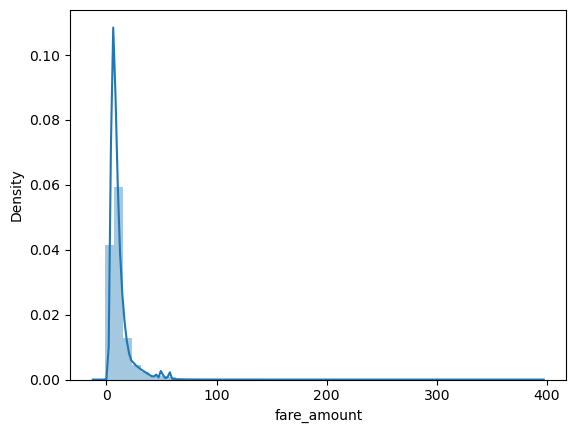

In [37]:
import seaborn as sns
sns.distplot(df['fare_amount']);

/Users/ankitsoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


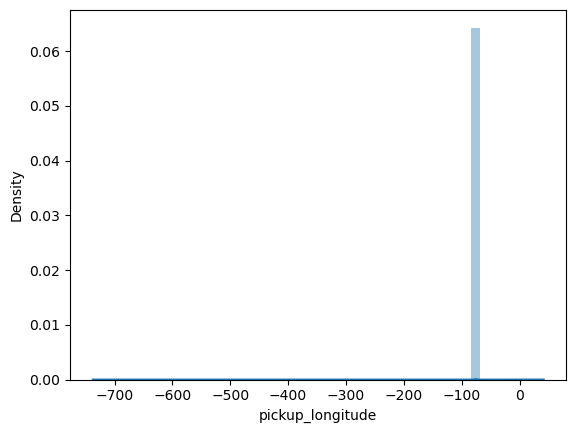

In [38]:
sns.distplot(df['pickup_longitude']);

/Users/ankitsoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


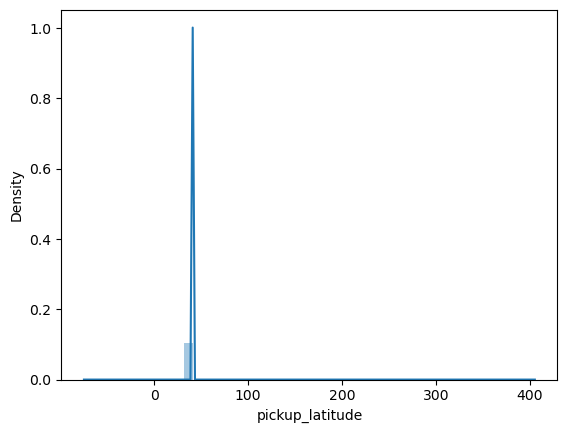

In [39]:
sns.distplot(df['pickup_latitude']);

/Users/ankitsoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


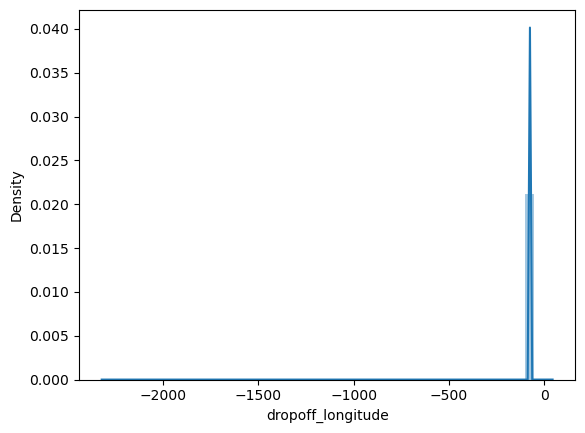

In [40]:
sns.distplot(df['dropoff_longitude']);

/Users/ankitsoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


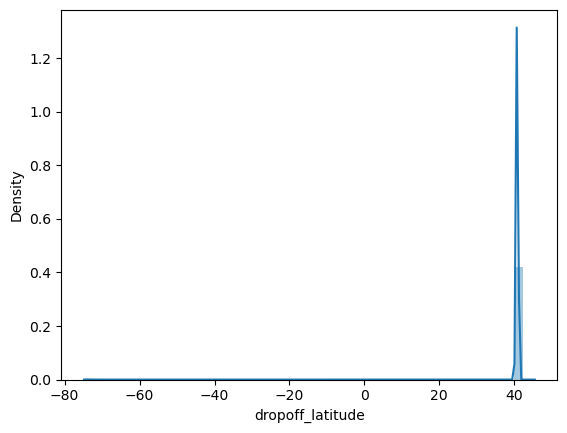

In [41]:
sns.distplot(df['dropoff_latitude']);

/Users/ankitsoni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


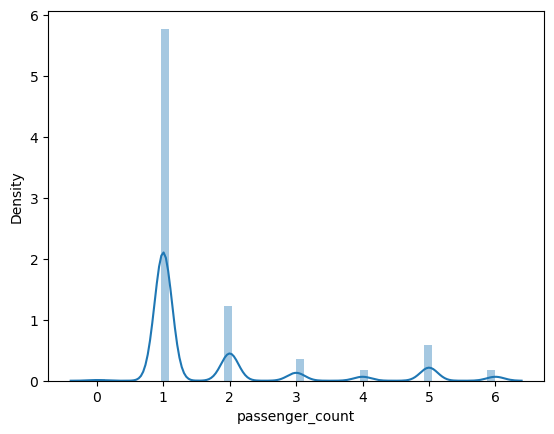

In [42]:
sns.distplot(df['passenger_count']);

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Data Scaling | Normalization</div>
<center>


We can perform the feature scaling using two methods:
* Normalization: Making the values between 0 and 1
* Standardization: Transforming the data so that the mean is 0 and standard deviation is 1
<br><br>Since both of these are part of feature scaling, let's chose the first one and normalize the data and set it to be between 0 and 1.

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_norm

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Date,Day of Week,Hour
0,0.00000,0.035210,0.852313,0.239707,0.951374,0.967085,0.333333,0.000116,0.000000,0.272727,0.233333,0.333333,0.826087
1,0.00001,0.035210,0.852353,0.239846,0.951385,0.967663,0.333333,0.000109,0.500000,0.545455,0.966667,0.000000,0.695652
2,0.00002,0.040169,0.852347,0.239782,0.951390,0.967493,0.166667,0.000282,0.333333,0.090909,0.700000,0.166667,0.565217
3,0.00003,0.058021,0.852306,0.239665,0.951378,0.967210,0.166667,0.000529,0.166667,0.818182,0.200000,0.500000,0.913043
4,0.00004,0.053062,0.852305,0.239665,0.951379,0.967173,0.833333,0.000498,0.000000,0.818182,0.033333,0.666667,0.956522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97944,0.99996,0.034218,0.852355,0.239800,0.951390,0.967361,0.166667,0.000124,1.000000,0.363636,0.600000,0.166667,0.739130
97945,0.99997,0.086288,0.852586,0.239525,0.951421,0.966440,0.166667,0.000837,1.000000,0.454545,0.966667,0.166667,0.695652
97946,0.99998,0.059013,0.852334,0.239771,0.951373,0.967078,0.166667,0.000291,0.833333,0.181818,0.000000,0.833333,0.739130
97947,0.99999,0.045376,0.852367,0.239813,0.951378,0.967459,0.166667,0.000215,0.666667,1.000000,1.000000,0.166667,1.000000


We have stored our scaled data in df_norm DataFrame and now we'll use this dataframe to feed into the regression pipeline further!

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Feature Selection</div>
<center>


Feature selection is one of the most important parts for any ML model. We always want to select those features which have the maximum effect on our final output, so we'll use SK Learn's built in feaature selextion tool which chooses best k features to improve the overall efficiency of our model

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_norm_temp = pd.DataFrame
df_norm_temp = df_norm.astype('int64') 

We import SK Learn's library which will help us in selecting the best k features for our dataframe, where k is a hyperparameter. Once we decide a value for k, then we can use only those features and our overall accuracy will come out to be great!

In [45]:
#df_norm = df_norm.astype('int') 

X = df_norm_temp.iloc[:,1:].values
y = df_norm_temp.iloc[:,0].values

In [46]:
X_new = SelectKBest(chi2, k=6).fit(X, y)

Since we have a total of 12 or 13 features in our data at the current moment, let's decide to keep the top 6 features in the dataframe that we'll be operating upon.

In [47]:
X_new

SelectKBest(k=6, score_func=<function chi2 at 0x7f91b9f563a0>)

In [48]:
f = X_new.get_support(1)
for i in f:
    print(df_norm.columns[i])

dropoff_longitude
dropoff_latitude
passenger_count
distance
Date
Day of Week


Above are the 6 best features that we can work on and let's make a the final dataframe out of this! So let's make a new dataframe and merge the final with it.

In [49]:
df_test_new = pd.DataFrame
df_test_new = df_norm[["fare_amount", "dropoff_longitude", "dropoff_latitude", "passenger_count", "distance", "Date", "Day of Week", "Hour"]]
df_norm = df_test_new
df_norm

,fare_amount,dropoff_longitude,dropoff_latitude,passenger_count,distance,Date,Day of Week,Hour
0,0.035210,0.951374,0.967085,0.333333,0.000116,0.233333,0.333333,0.826087
1,0.035210,0.951385,0.967663,0.333333,0.000109,0.966667,0.000000,0.695652
2,0.040169,0.951390,0.967493,0.166667,0.000282,0.700000,0.166667,0.565217
3,0.058021,0.951378,0.967210,0.166667,0.000529,0.200000,0.500000,0.913043
4,0.053062,0.951379,0.967173,0.833333,0.000498,0.033333,0.666667,0.956522
...,...,...,...,...,...,...,...,...
97944,0.034218,0.951390,0.967361,0.166667,0.000124,0.600000,0.166667,0.739130
97945,0.086288,0.951421,0.966440,0.166667,0.000837,0.966667,0.166667,0.695652
97946,0.059013,0.951373,0.967078,0.166667,0.000291,0.000000,0.833333,0.739130
97947,0.045376,0.951378,0.967459,0.166667,0.000215,1.000000,0.166667,1.000000


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">SK Learn Pipeline</div>
<center>


Now we have to make a pipeline which takes the raw data as input and finaaly prepares the data we just finalized, including the scaled values!

We'll transform the data into final scaled format in just one cell as below:

In [50]:
df_temp.drop(temp_coord_list, axis=0, inplace=True)
df_temp = df_temp.reset_index()

In [51]:
sk_data = pd.read_csv('train_NYTaxi.csv')
sk_data.drop(temp_coord_list, axis=0, inplace=True)
sk_data = sk_data.reset_index()

# till here we have dropped textual attributes
dist_sk = []

for i in range (0, len(df)):
    dist_sk.append(distance(df['pickup_latitude'][i], df['pickup_longitude'][i], df['dropoff_latitude'][i], df['dropoff_longitude'][i]))
sk_data['distance'] = dist_sk

sk_data['Year'] = df_temp['Year']
sk_data['Month'] = df_temp['Month']
sk_data['Date'] = df_temp['Date']
sk_data['Day of Week'] = df_temp['Day of Week']
sk_data['Hour'] = df_temp['Hour']

sk_num = sk_data.drop(["Unnamed: 0", "key", "pickup_datetime"], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(sk_num[['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour']])
sk_num[['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour']] = imputer.transform(sk_num[['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour']])

# Now we have also imputed the missiong values using mean method


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sk_norm = pd.DataFrame(scaler.fit_transform(sk_num), columns=sk_num.columns)

# after dropping the required fields, sk_norm will be

sk_norm = df_norm
sk_norm
# We have also scaled our data, so our SK Learn pipeline is ready!

,fare_amount,dropoff_longitude,dropoff_latitude,passenger_count,distance,Date,Day of Week,Hour
0,0.035210,0.951374,0.967085,0.333333,0.000116,0.233333,0.333333,0.826087
1,0.035210,0.951385,0.967663,0.333333,0.000109,0.966667,0.000000,0.695652
2,0.040169,0.951390,0.967493,0.166667,0.000282,0.700000,0.166667,0.565217
3,0.058021,0.951378,0.967210,0.166667,0.000529,0.200000,0.500000,0.913043
4,0.053062,0.951379,0.967173,0.833333,0.000498,0.033333,0.666667,0.956522
...,...,...,...,...,...,...,...,...
97944,0.034218,0.951390,0.967361,0.166667,0.000124,0.600000,0.166667,0.739130
97945,0.086288,0.951421,0.966440,0.166667,0.000837,0.966667,0.166667,0.695652
97946,0.059013,0.951373,0.967078,0.166667,0.000291,0.000000,0.833333,0.739130
97947,0.045376,0.951378,0.967459,0.166667,0.000215,1.000000,0.166667,1.000000


Above is the result when we used normalization, which scales the values between 0 and 1, now let's scale the data as done below using SKLearn pipeline

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

class fill_median(BaseEstimator, TransformerMixin):
    # Taking which column to modify as "col" parameter
    def __init__(self, col):
        self.col = col
    
    # Fit just calculated the median value and stores it as class variable
    def fit(self, X, y=None):
        self.median = X[self.col].median()
        return self
    
    # Transform updates all NaN values with median
    def transform(self, X):
        return X.fillna(self.median)
    

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pre_pipe = Pipeline([
    ('fillna', fill_median(col=['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count'])),
    ('Standard_scaling', StandardScaler())
])

# we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# Later it also transforms the input data as per the "transform()" definition of each object
train_prepared = pre_pipe.fit_transform(sk_num)
train_prepared

array([[-1.73263131, -0.65928199, -0.0260458 , ..., -0.88494125,
        -0.52794214,  0.84205532],
       [-1.73259667, -0.65928199, -0.01724208, ...,  1.64654794,
        -1.55368732,  0.38130316],
       [-1.73256202, -0.45392172, -0.01864251, ...,  0.72600642,
        -1.04081473, -0.079449  ],
       ...,
       [ 1.73158449,  0.32644731, -0.02152754, ..., -1.57534739,
         1.01067563,  0.84205532],
       [ 1.73161913, -0.23829344, -0.01441566, ...,  1.41641256,
         1.01067563,  0.2277191 ],
       [ 1.73165377,  0.37778738, -0.02362276, ...,  1.18627718,
         1.01067563,  0.84205532]])

Above is our final scaled values which we got using sklearn! However, we are not going to use the scaled data, as it may cause problems, so we'll go with normalized data instead.

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Splitting the Training Data in Test and Train Manually & Running Linear Regression</div>
<center>


Validation set is very imporatant to judge the algorithm before we decide it to show the unseen data, as once the model sees the test data, it may get biased and that's what we want to avoid.<br><br>
Cross validation refers to taking one data points of the data divided into n points (n is the hyperparameter), and then training the data on the rest of the parts. When training is complete, we test the model on the point which was left earlier!<br><br> 
First let's see how the regression runs without the validation set:

In [54]:
sk_norm

,fare_amount,dropoff_longitude,dropoff_latitude,passenger_count,distance,Date,Day of Week,Hour
0,0.035210,0.951374,0.967085,0.333333,0.000116,0.233333,0.333333,0.826087
1,0.035210,0.951385,0.967663,0.333333,0.000109,0.966667,0.000000,0.695652
2,0.040169,0.951390,0.967493,0.166667,0.000282,0.700000,0.166667,0.565217
3,0.058021,0.951378,0.967210,0.166667,0.000529,0.200000,0.500000,0.913043
4,0.053062,0.951379,0.967173,0.833333,0.000498,0.033333,0.666667,0.956522
...,...,...,...,...,...,...,...,...
97944,0.034218,0.951390,0.967361,0.166667,0.000124,0.600000,0.166667,0.739130
97945,0.086288,0.951421,0.966440,0.166667,0.000837,0.966667,0.166667,0.695652
97946,0.059013,0.951373,0.967078,0.166667,0.000291,0.000000,0.833333,0.739130
97947,0.045376,0.951378,0.967459,0.166667,0.000215,1.000000,0.166667,1.000000


In [55]:
X = sk_norm.iloc[:,1:].values
y = sk_norm.iloc[:,0].values

We did this to separate dependent and independent variables

In [56]:
X

array([[0.95137439, 0.96708491, 0.33333333, ..., 0.23333333, 0.33333333,
        0.82608696],
       [0.95138463, 0.96766281, 0.33333333, ..., 0.96666667, 0.        ,
        0.69565217],
       [0.95138967, 0.96749347, 0.16666667, ..., 0.7       , 0.16666667,
        0.56521739],
       ...,
       [0.95137266, 0.96707836, 0.16666667, ..., 0.        , 0.83333333,
        0.73913043],
       [0.95137813, 0.96745852, 0.16666667, ..., 1.        , 0.16666667,
        1.        ],
       [0.95137433, 0.9670693 , 0.16666667, ..., 0.16666667, 0.66666667,
        0.04347826]])

In [57]:
y

array([0.03520952, 0.03520952, 0.04016861, ..., 0.05901314, 0.04537565,
       0.06025291])

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [59]:
print(regressor.intercept_)

-0.07403667191907604


In [60]:
print(regressor.coef_)

[ 1.29106425e-01  2.11013880e-03  1.67410803e-03  1.36017727e-01
 -3.86404987e-04 -1.67361058e-04  6.44254360e-05]


Since our regression line is in a 8 dimensional space, thus we get 7 slopes, one for each of the 7 dimensions! <br> 
With this we get to know that the line which best fits our data is:<br>
y = 1.29106425e-01*x1 - 2.11013880e-03*x2 + .....+ 6.44254360e-05<br><br>
However, we have not checked this line for accuracy using a test set and a training set, so let's try that approach!

Now let's make a part of code which splits the data into training and testing set so that we can see that how our model fares on the test set!

In [61]:
import random
total=[]
for i in range (0,len(sk_norm)):
    total.append(i)
    
num_train = int(len(total)*0.8)
num_test = len(total) - num_train

set_train = random.sample(total, num_train) # we take random sample of 80% data for training
set_test = [i for i in total if i not in set_train] # we take rest of the 20% data for the test set

In [62]:
train = sk_norm.iloc[set_train,:] 
train

,fare_amount,dropoff_longitude,dropoff_latitude,passenger_count,distance,Date,Day of Week,Hour
92259,0.045376,0.951381,0.967212,0.333333,0.000338,0.833333,0.500000,0.869565
3711,0.047855,0.951388,0.967448,0.166667,0.000188,0.366667,0.500000,0.739130
83353,0.041160,0.951390,0.967334,0.833333,0.000244,0.133333,0.500000,0.000000
62928,0.058021,0.951372,0.967236,0.166667,0.000549,0.066667,0.666667,0.347826
12078,0.041656,0.951385,0.967287,0.166667,0.000138,0.266667,0.833333,0.695652
...,...,...,...,...,...,...,...,...
21061,0.036201,0.951374,0.967206,0.833333,0.000175,0.500000,0.500000,1.000000
44516,0.039177,0.951378,0.967505,0.500000,0.000247,0.800000,0.666667,1.000000
47960,0.035210,0.951383,0.967297,0.000000,0.000074,0.633333,0.166667,0.434783
6422,0.036201,0.951374,0.967211,0.333333,0.000120,0.833333,0.333333,0.869565


In [63]:
test = sk_norm.iloc[set_test,:] 
test

,fare_amount,dropoff_longitude,dropoff_latitude,passenger_count,distance,Date,Day of Week,Hour
4,0.053062,0.951379,0.967173,0.833333,0.000498,0.033333,0.666667,0.956522
10,0.041160,0.951368,0.966966,0.166667,0.000184,0.166667,1.000000,0.043478
14,0.046615,0.951381,0.967244,0.166667,0.000123,0.366667,0.500000,0.782609
27,0.040417,0.951373,0.967202,0.166667,0.000150,0.100000,0.666667,0.391304
29,0.075130,0.951396,0.968027,0.166667,0.000863,0.566667,0.166667,0.826087
...,...,...,...,...,...,...,...,...
97920,0.041656,0.951389,0.967506,0.166667,0.000210,0.300000,1.000000,0.521739
97921,0.050335,0.951389,0.967346,0.833333,0.000274,0.000000,0.500000,0.913043
97924,0.067939,0.951367,0.966958,0.166667,0.000741,0.200000,1.000000,0.826087
97936,0.043144,0.951369,0.966854,0.166667,0.000285,0.133333,0.666667,0.304348


We have successfully splitted the data into the test and train sets respectively. The division is purely random and each time we run the code, a new training set and testing set will be created. Let's run the resgressor algorithm on this training set and then see it's accuracy using the testing set!

In [64]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

x = test.iloc[:,1:].values
Y = test.iloc[:,0].values

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [66]:
predictions=regressor.predict(x)
predictions

array([0.05205614, 0.05090348, 0.0509079 , ..., 0.05096776, 0.05097288,
       0.05086838])

In [67]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y, predictions)
rmse

0.0005748183106761813

So, according to our current model, the RMSE value that we have got is that of above, which is a pretty good score!<br><br> Now let's run the same operation using a validation set!

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Validation Set & Cross Validation (Along with Linear Regression)</div>
<center>


Let's use the concept we used above to make a validation and run a cross validation setting and see our overall accuracy of the model on the training data!

In [68]:
import random
acc = []

number = 10 # this is the hyperparameter which will decide that how many folds you want to use

for i in range (0, number):
    total=[]
    for i in range (0,len(sk_norm)):
        total.append(i)

    num_train = int(len(total)*0.8)
    num_test = len(total) - num_train

    set_train = random.sample(total, num_train) # we take random sample of 80% data for training
    set_test = [i for i in total if i not in set_train] # we take rest of the 20% data for the test set

    train = sk_norm.iloc[set_train,:] 
    test = sk_norm.iloc[set_test,:] 

    X = train.iloc[:,1:].values
    y = train.iloc[:,0].values

    x = test.iloc[:,1:].values
    Y = test.iloc[:,0].values

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X, y)
    rmse_val = mean_squared_error(Y, predictions)
    acc.append(rmse_val)

avg = sum(acc)/len(acc)
print('The average RMSE value over the validation set is:')
print(avg)

The average RMSE value over the validation set is:
0.0005820789536138744


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Matrix-Based Linear Regression</div>
<center>


We have implemented the linear regression using SK Learn libraries. Now let's implement the linear regression from scratch. First let's see how we can perform the regression using pseudo-inverse operation:

In [69]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

x = test.iloc[:,1:].values
Y = test.iloc[:,0].values

In [70]:
X = X.tolist()
for i in X:
    i.insert(0,1)
X = np.array(X)
X
# we have inserted 1 at the beginning of each column

array([[1.        , 0.95137514, 0.96720504, ..., 0.43333333, 0.83333333,
        0.43478261],
       [1.        , 0.95138864, 0.96749743, ..., 0.73333333, 0.33333333,
        0.65217391],
       [1.        , 0.95137567, 0.96680589, ..., 0.73333333, 0.83333333,
        0.56521739],
       ...,
       [1.        , 0.95137382, 0.96738329, ..., 0.7       , 0.33333333,
        0.95652174],
       [1.        , 0.95138245, 0.96732706, ..., 0.03333333, 0.66666667,
        0.17391304],
       [1.        , 0.95138371, 0.96757136, ..., 0.73333333, 0.        ,
        1.        ]])

In [71]:
reg_coef = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # this is the operation to calculate the pseudo-inverse
reg_coef

array([-4.74704060e-02,  1.01285995e-01,  2.04797403e-03,  1.58977519e-03,
        1.07352685e-01, -3.44606544e-04, -1.90653937e-04, -2.21194095e-05])

Above are the values of the coefficients of the regression line when we perform the linear regression using the pseudo-inverse operation. The line is:
y = -5.60407861e-02*x1 + 1.11069216e-01*x2+ ....... + 4.63829243e-05

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Optimization-Based Linear Regression (Gradient Descent)</div>
<center>


One another way to perform linear regression is by performing Gradient Descent, a technique in which we aim to reduce a loss function in order to minimize our error (in case of linear regression). So, let's run the Gradient Descent algorithm and see that what is the regression line that we get from it!

In [72]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

x = test.iloc[:,1:].values
Y = test.iloc[:,0].values

In [73]:
X = X.tolist()
for i in X:
    i.insert(0,1)
X = np.array(X)
X
# we have inserted 1 at the beginning of each column

array([[1.        , 0.95137514, 0.96720504, ..., 0.43333333, 0.83333333,
        0.43478261],
       [1.        , 0.95138864, 0.96749743, ..., 0.73333333, 0.33333333,
        0.65217391],
       [1.        , 0.95137567, 0.96680589, ..., 0.73333333, 0.83333333,
        0.56521739],
       ...,
       [1.        , 0.95137382, 0.96738329, ..., 0.7       , 0.33333333,
        0.95652174],
       [1.        , 0.95138245, 0.96732706, ..., 0.03333333, 0.66666667,
        0.17391304],
       [1.        , 0.95138371, 0.96757136, ..., 0.73333333, 0.        ,
        1.        ]])

In [74]:
y.shape

(78359,)

In [75]:
eta = 0.1  # learning rate
n_iterations = 1000
m = X.shape[0]

theta = np.random.randn(X.shape[1]).reshape(-1, 1)  # random initialization

print(theta.shape)
for iteration in range(n_iterations):
#     print((X @ theta - y.reshape(-1, 1)).shape)
    gradients = 2/m * X.T @ (X @ theta - y.reshape(-1, 1))
    theta = theta - eta * gradients

(8, 1)


In [76]:
theta

array([[ 5.65680599e-01],
       [-1.83081898e+00],
       [ 1.26465517e+00],
       [ 6.01225232e-03],
       [-1.32114728e-01],
       [ 1.40416346e-03],
       [ 1.90326703e-03],
       [ 2.30985031e-03]])

Above are the values of the coefficients of the regression line when we perform the linear regression using the gradient-descent operation. The line is:
y = -7.01401103e-01*x1 + 3.74040223e-01*x2+ ....... + 5.84784087e-04

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Non-Parametric Regression (KNN Regression)</div>
<center>


Let's discuss a last way to see that how can we do regression without any paramters, or non-parametric regression. We'll use K-Nearest Neighbors regression, which will predict the closest value based on the nearest neighbors in the vicinity and we'll also analyse the predicted values with RMSE metric and will try to see what value of k will be the most suitable for our algorithm!

In [77]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

x = test.iloc[:,1:].values
Y = test.iloc[:,0].values

In [78]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X, y)  #fit the model
    pred=model.predict(x) #make prediction on test set
    error = sqrt(mean_squared_error(Y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k = ' , K , 'is:', error)

RMSE value for k =  1 is: 0.02316249152912047
RMSE value for k =  2 is: 0.022581754803343526
RMSE value for k =  3 is: 0.022511480843568705
RMSE value for k =  4 is: 0.022620546818463823
RMSE value for k =  5 is: 0.02282496309442507
RMSE value for k =  6 is: 0.023021410574964714
RMSE value for k =  7 is: 0.02322658506516361
RMSE value for k =  8 is: 0.02338093939557578
RMSE value for k =  9 is: 0.023511847373461837
RMSE value for k =  10 is: 0.023622859045843672
RMSE value for k =  11 is: 0.02368490456438567
RMSE value for k =  12 is: 0.023712750741880548
RMSE value for k =  13 is: 0.023721269377450012
RMSE value for k =  14 is: 0.0237069055581235
RMSE value for k =  15 is: 0.02364951751482405
RMSE value for k =  16 is: 0.023589340125461378
RMSE value for k =  17 is: 0.023542689484323327
RMSE value for k =  18 is: 0.023504694417695336
RMSE value for k =  19 is: 0.023458991101022987
RMSE value for k =  20 is: 0.02343299170838729


Above are the various values of the RMSE loss function when we experiment with the different values of k, now let's plot a caurve out of the losses againt the values of k, and try to find out the best k for our model:

<AxesSubplot:>

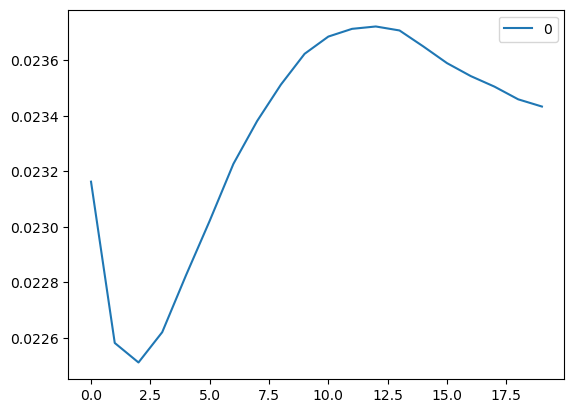

In [80]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Above plot is called the elbow plot due to it's shape. We observe that the best value of k is 1 or 2, depending on the curve, so if we use the value of k as 2, them our model will be the best and we'll get near accurate predictions!

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Which Regression Model is the Best?</div>
<center>


This is a very subjective question and this totally depend on a case to case basis. KNN Regression usually sufferes from the curse of dimensionality the most when the features are large, however since we performed feature scaling, thus KNN Regression ran quite fast on my system. Gradient descent usually takes a long time to converge, but if we use batch gradient descent or stochastic gradient descent, then it also works quite good. Lastly, the pseudo-inverse method is also computationally expensive as we have to calculate the inverses of matrices at time of huge matrices, which is time taking.<br>
In general, the pseudo-inverse model ran the best on my system!